In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',10) # 调整pandas行的显示限制 
from utils import *
import pandas as pd
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

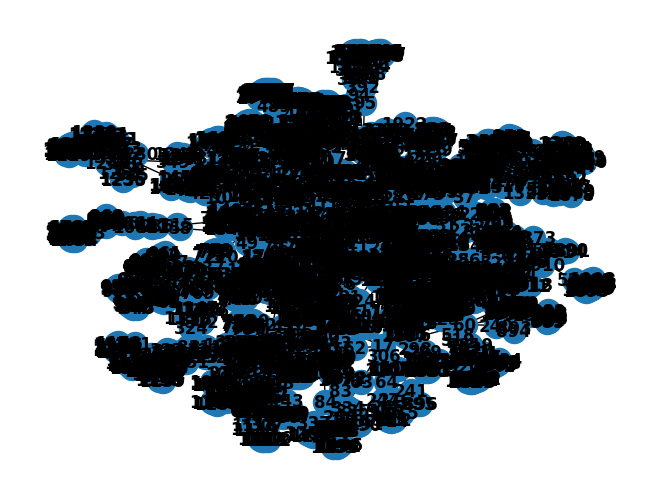

In [2]:
# Load node information from CSV file
node_df = pd.read_csv('AllNode_DrPr.csv', names=[0, 1], skiprows=1)

# Load edge information from CSV file
edge_df = pd.read_csv('DrPrNum_DrPr.csv', header=None)

# Load node attributes from CSV file
node_attributes_df = pd.read_csv('AllNodeAttribute_DrPr.csv', header=None)
node_attributes_df = node_attributes_df.iloc[:, 1:]

# Create a graph
G = nx.Graph()

# Add nodes with their corresponding entity types
for row in node_df.itertuples():
    G.add_node(row[0], entity=row[1])

# Add edges based on the information in all_edge_df
for row in edge_df.itertuples():
    G.add_edge(row[0], row[1])

# Display the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

# Now you can use this graph (G) along with node attributes (all_node_attributes_df) for further processing or analysis.


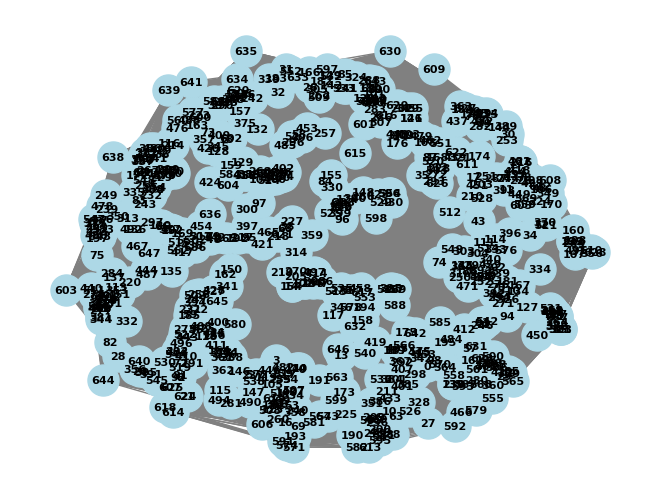

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# ساخت گراف
layered_graph = nx.Graph()

num_drugs = 549
num_proteins = 50
num_diseases = 30
num_side_effects = 20

layered_graph.add_nodes_from(range(num_drugs), entity='dr')
layered_graph.add_nodes_from(range(num_drugs, num_drugs + num_proteins), entity='pr')
layered_graph.add_nodes_from(range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases), entity='di')
layered_graph.add_nodes_from(range(num_drugs + num_proteins + num_diseases, num_drugs + num_proteins + num_diseases + num_side_effects), entity='se')

# افزودن یال‌ها بر اساس ارتباطات مختلف
# ارتباط دارو - عوارض جانبی
for drug in range(num_drugs):
    for side_effect in range(num_drugs + num_proteins + num_diseases, num_drugs + num_proteins + num_diseases + num_side_effects):
        layered_graph.add_edge(drug, side_effect, relation='drug-side_effect')

# ارتباط دارو - بیماری
for drug in range(num_drugs):
    for disease in range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases):
        layered_graph.add_edge(drug, disease, relation='drug-disease')

# تداخل دارو - پروتئین
for drug in range(num_drugs):
    for protein in range(num_drugs, num_drugs + num_proteins):
        layered_graph.add_edge(drug, protein, relation='drug-protein')

# تداخل پروتئین - پروتئین
for protein1 in range(num_drugs, num_drugs + num_proteins):
    for protein2 in range(num_drugs, num_drugs + num_proteins):
        if protein1 != protein2:
            layered_graph.add_edge(protein1, protein2, relation='protein-protein')

# ارتباط پروتئین - بیماری
for protein in range(num_drugs, num_drugs + num_proteins):
    for disease in range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases):
        layered_graph.add_edge(protein, disease, relation='protein-disease')

# شباهت دارو - دارو
for drug1 in range(num_drugs):
    for drug2 in range(num_drugs):
        if drug1 != drug2:
            layered_graph.add_edge(drug1, drug2, relation='similarity-drug')

# شباهت پروتئین - پروتئین
for protein1 in range(num_drugs, num_drugs + num_proteins):
    for protein2 in range(num_drugs, num_drugs + num_proteins):
        if protein1 != protein2:
            layered_graph.add_edge(protein1, protein2, relation='similarity-protein')

# نمایش گراف
pos = nx.spring_layout(layered_graph)
nx.draw(layered_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500, font_size=8, edge_color='gray')

plt.show()


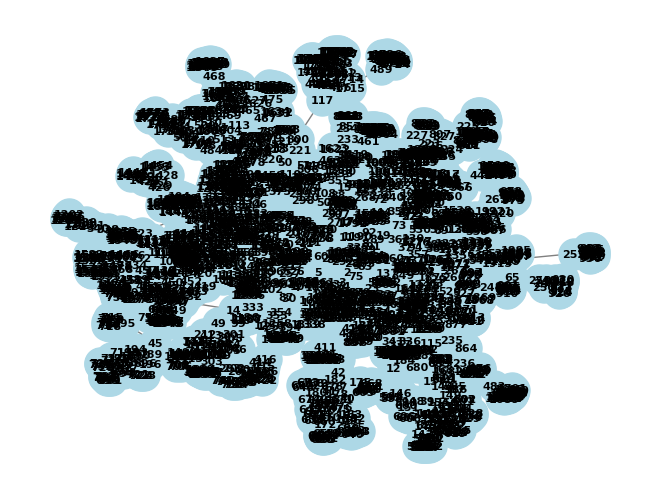

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load node information from CSV file
node_df = pd.read_csv('AllNode_DrPr.csv', names=[0, 1], skiprows=1)

# Load edge information from CSV file
edge_df = pd.read_csv('DrPrNum_DrPr.csv', header=None)

# Load node attributes from CSV file
node_attributes_df = pd.read_csv('AllNodeAttribute_DrPr.csv', header=None)
node_attributes_df = node_attributes_df.iloc[:, 1:]

# Create a graph
layered_graph = nx.Graph()

num_drugs = len(node_df[node_df[1] == 'dr'])
num_proteins = len(node_df[node_df[1] == 'pr'])
num_diseases = len(node_df[node_df[1] == 'di'])
num_side_effects = len(node_df[node_df[1] == 'se'])

layered_graph.add_nodes_from(range(num_drugs), entity='dr')
layered_graph.add_nodes_from(range(num_drugs, num_drugs + num_proteins), entity='pr')
layered_graph.add_nodes_from(range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases), entity='di')
layered_graph.add_nodes_from(range(num_drugs + num_proteins + num_diseases, num_drugs + num_proteins + num_diseases + num_side_effects), entity='se')

# Add edges based on different relationships
for row in edge_df.itertuples():
    layered_graph.add_edge(row[0], row[1], relation=row[2])

# Display the graph
pos = nx.spring_layout(layered_graph)
nx.draw(layered_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500, font_size=8, edge_color='gray')

plt.show()


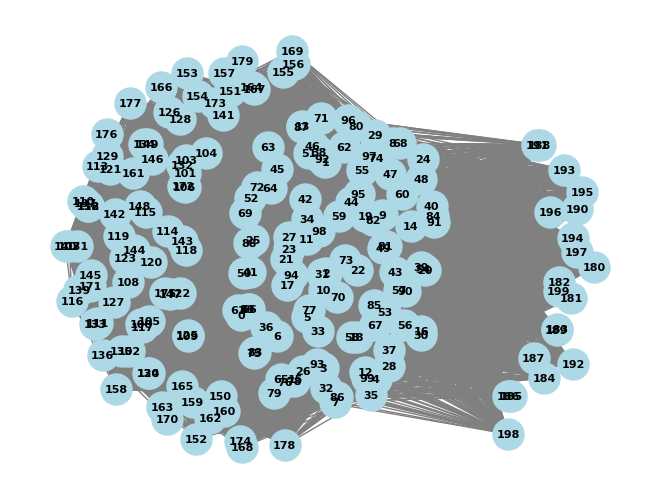

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# ساخت گراف
layered_graph = nx.Graph()

# افزودن نودها با توجه به موجودیت‌ها
num_drugs = 100
num_proteins = 50
num_diseases = 30
num_side_effects = 20

layered_graph.add_nodes_from(range(num_drugs), entity='dr')
layered_graph.add_nodes_from(range(num_drugs, num_drugs + num_proteins), entity='pr')
layered_graph.add_nodes_from(range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases), entity='di')
layered_graph.add_nodes_from(range(num_drugs + num_proteins + num_diseases, num_drugs + num_proteins + num_diseases + num_side_effects), entity='se')

# افزودن یال‌ها بر اساس ارتباطات مختلف
# ارتباط دارو - عوارض جانبی
for drug in range(num_drugs):
    for side_effect in range(num_drugs + num_proteins + num_diseases, num_drugs + num_proteins + num_diseases + num_side_effects):
        layered_graph.add_edge(drug, side_effect, relation='drug-side_effect')

# ارتباط دارو - بیماری
for drug in range(num_drugs):
    for disease in range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases):
        layered_graph.add_edge(drug, disease, relation='drug-disease')

# تداخل دارو - پروتئین
for drug in range(num_drugs):
    for protein in range(num_drugs, num_drugs + num_proteins):
        layered_graph.add_edge(drug, protein, relation='drug-protein')

# تداخل پروتئین - پروتئین
for protein1 in range(num_drugs, num_drugs + num_proteins):
    for protein2 in range(num_drugs, num_drugs + num_proteins):
        if protein1 != protein2:
            layered_graph.add_edge(protein1, protein2, relation='protein-protein')

# ارتباط پروتئین - بیماری
for protein in range(num_drugs, num_drugs + num_proteins):
    for disease in range(num_drugs + num_proteins, num_drugs + num_proteins + num_diseases):
        layered_graph.add_edge(protein, disease, relation='protein-disease')

# شباهت دارو - دارو
for drug1 in range(num_drugs):
    for drug2 in range(num_drugs):
        if drug1 != drug2:
            layered_graph.add_edge(drug1, drug2, relation='similarity-drug')

# شباهت پروتئین - پروتئین
for protein1 in range(num_drugs, num_drugs + num_proteins):
    for protein2 in range(num_drugs, num_drugs + num_proteins):
        if protein1 != protein2:
            layered_graph.add_edge(protein1, protein2, relation='similarity-protein')

# نمایش گراف
pos = nx.spring_layout(layered_graph)
nx.draw(layered_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500, font_size=8, edge_color='gray')

plt.show()


File Content: 'DB00001:Lepirudin\nDB00002:Cetuximab\nDB00003:Dornase Alfa\nDB00004:Denileukin diftitox\nDB00005:Etanercept\nDB00006:Bivalirudin\nDB00007:Leuprolide\nDB00008:Peginterferon alfa-2a\nDB00009:Alteplase\nDB00010:Sermorelin\nDB00011:Interferon alfa-n1\nDB00012:Darbepoetin alfa\nDB00013:Urokinase\nDB00014:Goserelin\nDB00015:Reteplase\nDB00016:Epoetin alfa\nDB00017:Salmon Calcitonin\nDB00018:Interferon alfa-n3\nDB00019:Pegfilgrastim\nDB00020:Sargramostim\nDB00021:Secretin\nDB00022:Peginterferon alfa-2b\nDB00023:Asparaginase\nDB00024:Thyrotropin Alfa\nDB00025:Antihemophilic Factor\nDB00026:Anakinra\nDB00027:Gramicidin D\nDB00028:Intravenous Immunoglobulin\nDB00029:Anistreplase\nDB00030:Insulin Regular\nDB00031:Tenecteplase\nDB00032:Menotropins\nDB00033:Interferon gamma-1b\nDB00034:Interferon Alfa-2a, Recombinant\nDB00035:Desmopressin\nDB00036:Coagulation factor VIIa\nDB00038:Oprelvekin\nDB00039:Palifermin\nDB00040:Glucagon recombinant\nDB00041:Aldesleukin\nDB00042:Botulinum Toxi

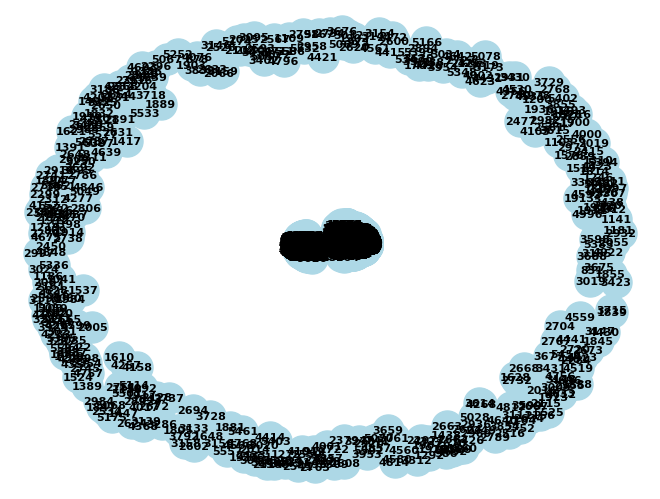

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json


# Load data from files
with open("disease.txt", "r") as f:
    diseases = f.readlines()
diseases = [disease.strip() for disease in diseases]

with open("drug.txt", "r") as f:
    drugs = f.readlines()
drugs = [drug.strip() for drug in drugs]

with open("drug_dict_map.txt", "r") as f:
    content = f.read()
    print("File Content:", repr(content))  # Add this line
    try:
        drug_dict_map = json.loads(content)
    except json.JSONDecodeError as e:
        print("JSON Decode Error:", e)  # Add this line
        drug_dict_map = {}


with open("mat_drug_disease.txt", "r") as f:
    mat_drug_disease = np.loadtxt(f)
mat_drug_drug = np.loadtxt("mat_drug_drug.txt")
mat_drug_protein = np.loadtxt("mat_drug_protein.txt")
mat_protein_disease = np.loadtxt("mat_protein_disease.txt")
mat_protein_protein = np.loadtxt("mat_protein_protein.txt")

# Create a graph
layered_graph = nx.Graph()

# Add nodes with entities
for idx, disease in enumerate(diseases):
    layered_graph.add_node(idx, entity='di', label=disease)

for idx, drug in enumerate(drugs):
    layered_graph.add_node(idx + len(diseases), entity='dr', label=drug)

# Add edges based on matrices
for i in range(mat_drug_disease.shape[0]):
    for j in range(mat_drug_disease.shape[1]):
        if mat_drug_disease[i, j] == 1:
            layered_graph.add_edge(j, i, relation='drug-disease')

for i in range(mat_drug_protein.shape[0]):
    for j in range(mat_drug_protein.shape[1]):
        if mat_drug_protein[i, j] == 1:
            layered_graph.add_edge(i + len(diseases), j + len(diseases), relation='drug-protein')

for i in range(mat_protein_disease.shape[0]):
    for j in range(mat_protein_disease.shape[1]):
        if mat_protein_disease[i, j] == 1:
            layered_graph.add_edge(i + len(diseases) + len(drugs), j + len(diseases), relation='protein-disease')

for i in range(mat_protein_protein.shape[0]):
    for j in range(mat_protein_protein.shape[1]):
        if mat_protein_protein[i, j] == 1 and i != j:
            layered_graph.add_edge(i + len(diseases) + len(drugs), j + len(diseases) + len(drugs), relation='protein-protein')

# Display the graph
pos = nx.spring_layout(layered_graph)
nx.draw(layered_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500, font_size=8, edge_color='gray')

plt.show()


خطای تجزیه JSON: Expecting value: line 1 column 1 (char 0)


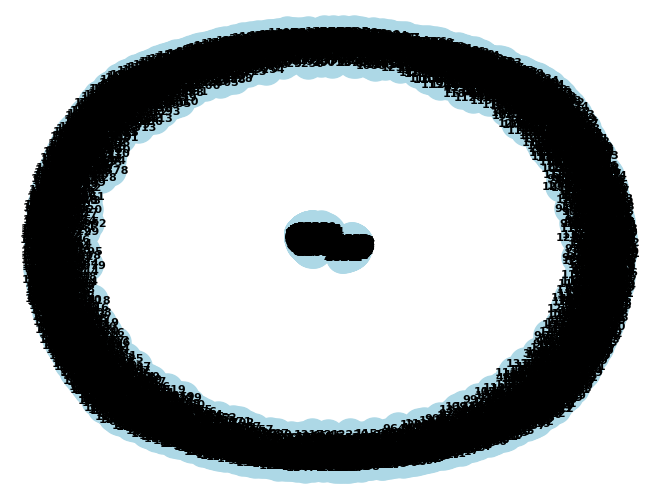

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json

# بارگذاری داده‌ها از فایل‌ها
with open("disease.txt", "r") as f:
    diseases = f.readlines()
diseases = [disease.strip() for disease in diseases]

with open("drug.txt", "r") as f:
    drugs = f.readlines()
drugs = [drug.strip() for drug in drugs]

with open("drug_dict_map.txt", "r") as f:
    content = f.read()
    try:
        drug_dict_map = json.loads(content)
    except json.JSONDecodeError as e:
        print("خطای تجزیه JSON:", e)
        drug_dict_map = {}

with open("mat_drug_disease.txt", "r") as f:
    mat_drug_disease = np.loadtxt(f)
mat_drug_drug = np.loadtxt("mat_drug_drug.txt")
mat_drug_protein = np.loadtxt("mat_drug_protein.txt")
mat_protein_disease = np.loadtxt("mat_protein_disease.txt")
mat_protein_protein = np.loadtxt("mat_protein_protein.txt")

# ایجاد یک گراف چند لایه
layered_graph = nx.MultiGraph()

# افزودن نودها با موجودیت‌ها و برچسب‌ها
for idx, disease in enumerate(diseases):
    layered_graph.add_node(idx, entity='di', label=disease)

for idx, drug in enumerate(drugs):
    layered_graph.add_node(idx + len(diseases), entity='dr', label=drug)

for idx, protein in enumerate(range(mat_drug_protein.shape[1])):
    layered_graph.add_node(idx + len(diseases) + len(drugs), entity='pr', label=f'پروتئین {protein + 1}')

for idx, side_effect in enumerate(range(mat_protein_disease.shape[1])):
    layered_graph.add_node(idx + len(diseases) + len(drugs) + len(range(mat_drug_protein.shape[1])),
                           entity='se', label=f'عارضه جانبی {side_effect + 1}')

# افزودن یال‌ها بر اساس ماتریس‌ها
for i in range(mat_drug_disease.shape[0]):
    for j in range(mat_drug_disease.shape[1]):
        if mat_drug_disease[i, j] == 1:
            layered_graph.add_edge(j, i, relation='دارو-بیماری')

for i in range(mat_drug_protein.shape[0]):
    for j in range(mat_drug_protein.shape[1]):
        if mat_drug_protein[i, j] == 1:
            layered_graph.add_edge(i + len(diseases), j + len(diseases) + len(drugs), relation='دارو-پروتئین')

for i in range(mat_protein_disease.shape[0]):
    for j in range(mat_protein_disease.shape[1]):
        if mat_protein_disease[i, j] == 1:
            layered_graph.add_edge(i + len(diseases) + len(drugs), j + len(diseases), relation='پروتئین-بیماری')

for i in range(mat_protein_protein.shape[0]):
    for j in range(mat_protein_protein.shape[1]):
        if mat_protein_protein[i, j] == 1 and i != j:
            layered_graph.add_edge(i + len(diseases) + len(drugs), j + len(diseases) + len(drugs),
                                   relation='پروتئین-پروتئین')

# نمایش گراف چند لایه
pos = nx.spring_layout(layered_graph)
nx.draw(layered_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500, font_size=8,
        edge_color='gray', font_color='black')

plt.show()


خطای تجزیه JSON: Expecting value: line 1 column 1 (char 0)


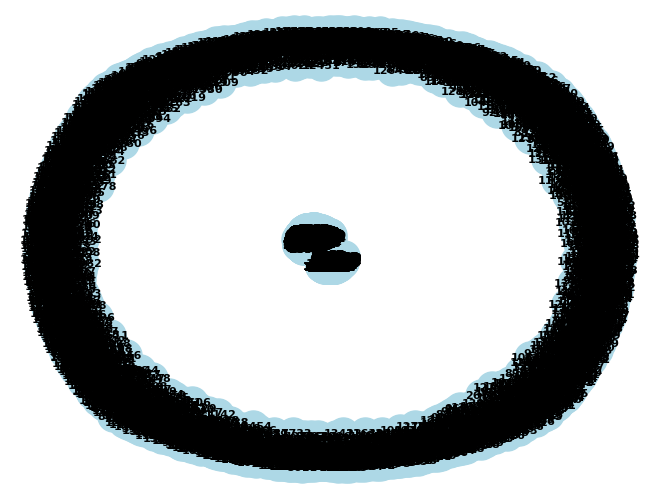

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

# بارگذاری داده‌ها از فایل‌ها
with open("disease.txt", "r") as f:
    diseases = f.readlines()
diseases = [disease.strip() for disease in diseases]

with open("drug.txt", "r") as f:
    drugs = f.readlines()
drugs = [drug.strip() for drug in drugs]

with open("drug_dict_map.txt", "r") as f:
    content = f.read()
    try:
        drug_dict_map = json.loads(content)
    except json.JSONDecodeError as e:
        print("خطای تجزیه JSON:", e)
        drug_dict_map = {}

with open("mat_drug_disease.txt", "r") as f:
    mat_drug_disease = np.loadtxt(f)
mat_drug_drug = np.loadtxt("mat_drug_drug.txt")
mat_drug_protein = np.loadtxt("mat_drug_protein.txt")
mat_protein_disease = np.loadtxt("mat_protein_disease.txt")
mat_protein_protein = np.loadtxt("mat_protein_protein.txt")

# خواندن فایل CSV نودها
nodes_df = pd.read_csv("AllNode_DrPr.csv")

# خواندن فایل CSV یال‌ها
edges_df = pd.read_csv("DrPrNum_DrPr.csv")

# ایجاد یک گراف چند لایه
layered_graph = nx.MultiGraph()

# افزودن نودها با موجودیت‌ها و برچسب‌ها
for idx, disease in enumerate(diseases):
    layered_graph.add_node(idx, entity='di', label=disease)

for idx, drug in enumerate(drugs):
    layered_graph.add_node(idx + len(diseases), entity='dr', label=drug)

for idx, protein in enumerate(range(mat_drug_protein.shape[1])):
    layered_graph.add_node(idx + len(diseases) + len(drugs), entity='pr', label=f'پروتئین {protein + 1}')

for idx, side_effect in enumerate(range(mat_protein_disease.shape[1])):
    layered_graph.add_node(idx + len(diseases) + len(drugs) + len(range(mat_drug_protein.shape[1])),
                           entity='se', label=f'عارضه جانبی {side_effect + 1}')

# افزودن یال‌ها بر اساس ماتریس‌ها
for i in range(mat_drug_disease.shape[0]):
    for j in range(mat_drug_disease.shape[1]):
        if mat_drug_disease[i, j] == 1:
            layered_graph.add_edge(j, i, relation='دارو-بیماری')

for i in range(mat_drug_protein.shape[0]):
    for j in range(mat_drug_protein.shape[1]):
        if mat_drug_protein[i, j] == 1:
            layered_graph.add_edge(i + len(diseases), j + len(diseases) + len(drugs), relation='دارو-پروتئین')

for i in range(mat_protein_disease.shape[0]):
    for j in range(mat_protein_disease.shape[1]):
        if mat_protein_disease[i, j] == 1:
            layered_graph.add_edge(i + len(diseases) + len(drugs), j + len(diseases), relation='پروتئین-بیماری')

for i in range(mat_protein_protein.shape[0]):
    for j in range(mat_protein_protein.shape[1]):
        if mat_protein_protein[i, j] == 1 and i != j:
            layered_graph.add_edge(i + len(diseases) + len(drugs), j + len(diseases) + len(drugs),
                                   relation='پروتئین-پروتئین')

# افزودن یال‌ها بر اساس ترتیب در فایل CSV
for _, edge in enumerate(edges_df.itertuples(), start=1):
    layered_graph.add_edge(edge[1], edge[2], relation=f'relation_{_}')



# نمایش گراف چند لایه
pos = nx.spring_layout(layered_graph)
nx.draw(layered_graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500, font_size=8,
        edge_color='gray', font_color='black')

plt.show()
